<a href="https://colab.research.google.com/github/Monalika-P/Emotion-AI/blob/main/Emotion_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author - Monalika P

## Facial Key Points Detector

The objective of this task is to predict keypoint positions on face images. This can be used as a building block in several applications, such as:

tracking faces in images and video

1.   Analysing facial expressions
2.   Detecting dysmorphic facial signs for medical diagnosis
3.   Biometrics / face recognition



### Connecting to Kaggle and obtaining the dataset

In [6]:
from google.colab import files
files.upload()


! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json


Saving kaggle.json to kaggle.json
mkdir: cannot create directory ‘/root/.kaggle’: File exists


### Downloading the dataset

In [61]:
! kaggle competitions download -c facial-keypoints-detection

100% 16.0M/16.0M [00:00<00:00, 36.9MB/s]

 80% 48.0M/60.1M [00:00<00:00, 58.3MB/s]
100% 60.1M/60.1M [00:00<00:00, 102MB/s] 
  0% 0.00/843k [00:00<?, ?B/s]
100% 843k/843k [00:00<00:00, 113MB/s]
  0% 0.00/201k [00:00<?, ?B/s]
100% 201k/201k [00:00<00:00, 64.5MB/s]


In [62]:
! unzip /content/test.zip
! unzip /content/training.zip

Archive:  /content/test.zip
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: Archive:  /content/training.zip
  inflating: training.csv            


### Importing the dependencies

In [56]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

###  Loading the dataser

In [63]:
keyfacial_df = pd.read_csv('/content/training.csv')

In [64]:
keyfacial_df.head(5)

left_eye_center_x  ...                                              Image
0          66.033564  ...  238 236 237 238 240 240 239 241 241 243 240 23...
1          64.332936  ...  219 215 204 196 204 211 212 200 180 168 178 19...
2          65.057053  ...  144 142 159 180 188 188 184 180 167 132 84 59 ...
3          65.225739  ...  193 192 193 194 194 194 193 192 168 111 50 12 ...
4          66.725301  ...  147 148 160 196 215 214 216 217 219 220 206 18...

[5 rows x 31 columns]

### Obtaining the dataset information

In [65]:
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

### Check if null values exist in the dataset

In [66]:
keyfacial_df.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

### Dropping the null values

In [67]:
keyfacial_df.dropna(how = 'any', inplace = True)

In [68]:
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [69]:
keyfacial_df.shape

(2140, 31)

### Reshaping all the images to 96 pixels


Since values for the image are given as space separated string, separate the values using '  ' as separator. Then convert this into numpy array using np.fromstring and convert the obtained 1D array into 2D array of shape (96, 96)


In [70]:
keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [71]:
keyfacial_df['Image'][0].shape

(96, 96)

### Description of the dataset

In [72]:
keyfacial_df.describe()

left_eye_center_x  ...  mouth_center_bottom_lip_y
count        2140.000000  ...                2140.000000
mean           66.221549  ...                  82.630412
std             2.087683  ...                   4.813557
min            47.835757  ...                  57.232296
25%            65.046300  ...                  79.417480
50%            66.129065  ...                  82.388899
75%            67.332093  ...                  85.697976
max            78.013082  ...                  95.808983

[8 rows x 30 columns]

### Image Visualization

#### Plotting random images

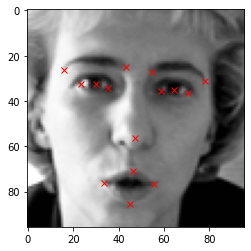

In [73]:
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

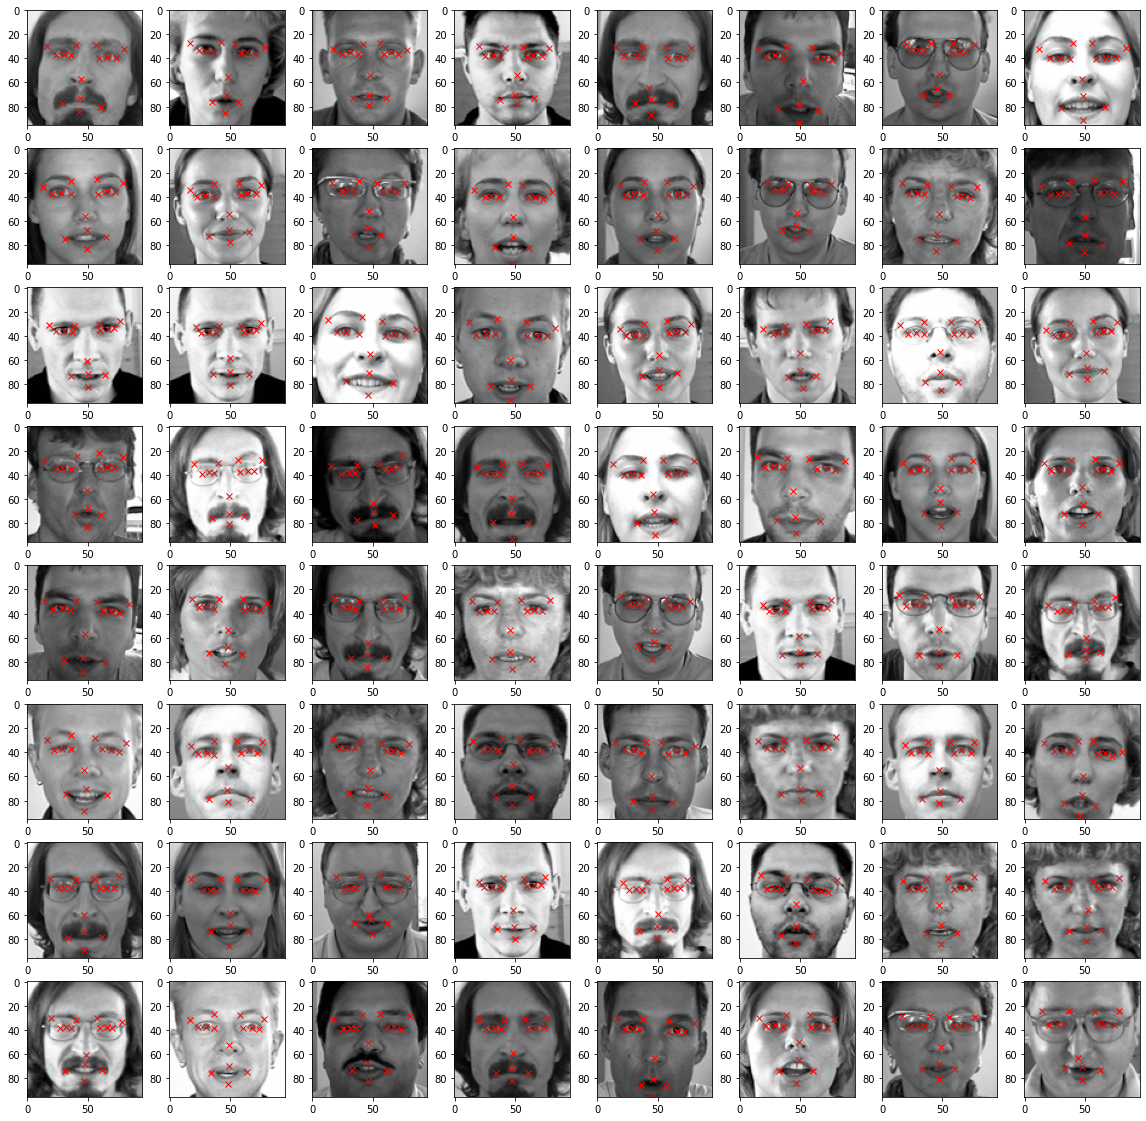

In [74]:
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1)    
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

### Image Augmentation

Creating a new copy of the dataframe

In [83]:
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

In [84]:
columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

#### Horizontal Flip

In [85]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

Since we are flipping horizontally, y coordinate values would be the same
Only x coordiante values would change, all we have to do is to subtract our initial x-coordinate values from width of the image(96)

In [86]:
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

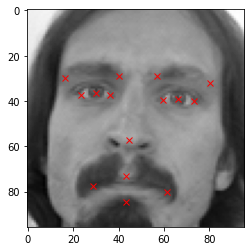

In [87]:
plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

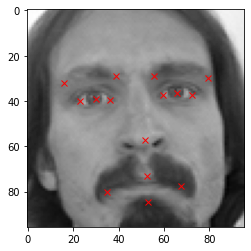

In [88]:
# Show the Horizontally flipped image
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

#### Concatenate the original dataframe with the augmented dataframe

In [89]:
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))

In [90]:
import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x:np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

### Show Image with increased brightness

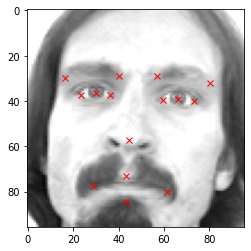

In [91]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

#### Vertical flipping

In [92]:
keyfacial_df_copy = copy.copy(keyfacial_df)

In [93]:
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

### Sanity check

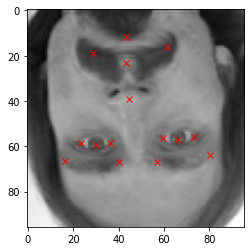

In [94]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

### Data Normalization and Visualization

In [95]:
img = augmented_df[:,30]

# Normalize the images
img = img/255.

# Create an empty array of shape (x, 96, 96, 1) to feed the model
X = np.empty((len(img), 96, 96, 1))

# Iterate through the list and add image values to the empty array after expanding it's dimension from (96, 96) to (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convert the array type to float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [96]:
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

### Splitting the data into train and test data

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Building the deep residual neural network for facial points detections

#### Importing the packages

In [98]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.python.keras import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras import backend
from keras import optimizers

In [99]:
def res_block(X, filter, stage):

  # Convolutional_block
  X_copy = X

  f1 , f2, f3 = filter

  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Short path
  X_copy = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= glorot_uniform(seed = 0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 1
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  # Identity Block 2
  X_copy = X


  # Main Path
  X = Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X) 

  X = Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= glorot_uniform(seed = 0))(X)
  X = BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  return X

In [100]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3,3))(X_input)

# 1 - stage
X = Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - stage
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128,128,512], stage= 3)


# Average Pooling
X = AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(4096, activation = 'relu')(X)
X = Dropout(0.2)(X)
X = Dense(2048, activation = 'relu')(X)
X = Dropout(0.1)(X)
X = Dense(30, activation = 'relu')(X)


In [101]:
model_1_facialKeyPoints = Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 102, 102, 1)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d[0][0]             
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
_______________________________________________________________________________________

### Plotting the model

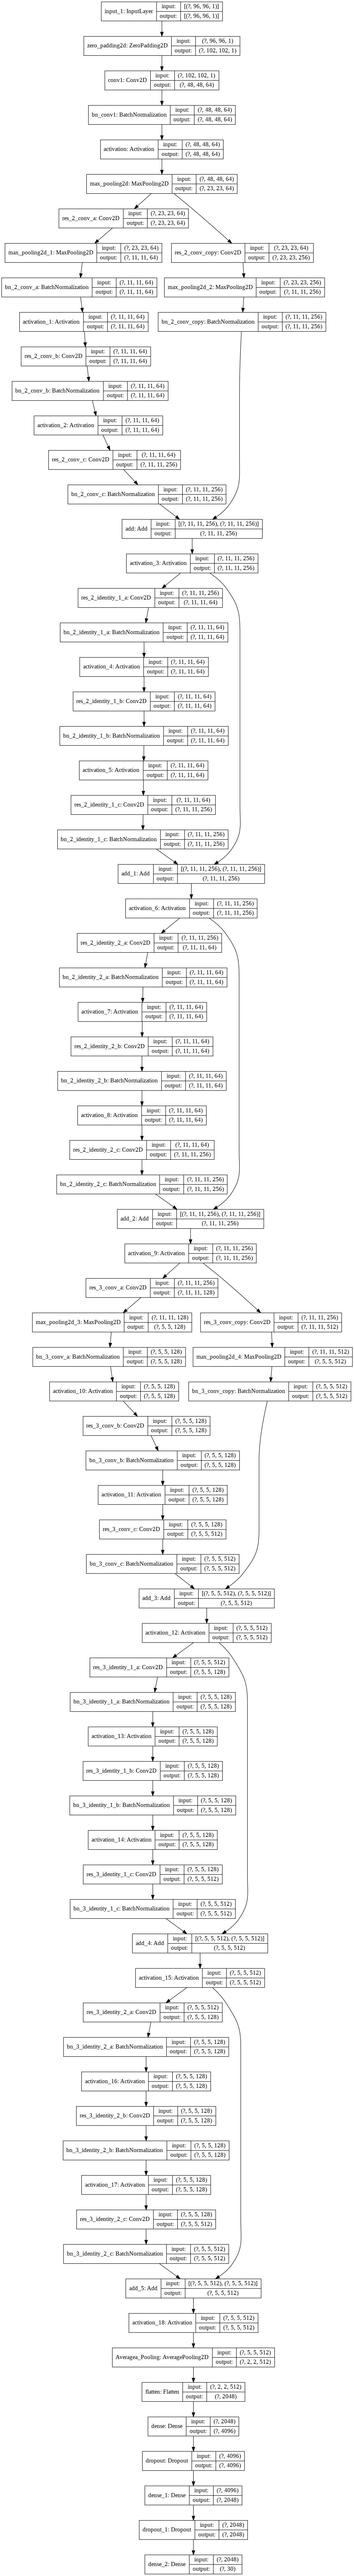

In [102]:
tf.keras.utils.plot_model(model_1_facialKeyPoints, 'facial_model.png', show_shapes = True, show_layer_names = True)

In [103]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = adam , metrics = ['accuracy'])

### Creating checkpoints and callbacks

In [104]:
checkpointer = ModelCheckpoint(filepath = "FacialKeyPoints_weights.hdf5", verbose = 1, save_best_only = True)

In [105]:
earlystopping = EarlyStopping( monitor = 'val_accuracy', patience= 3, mode = 'max' , restore_best_weights= True , min_delta= 0.001 )

In [106]:
callbacks = [checkpointer]

In [ ]:
history = my_model.fit(X_train, y_train, batch_size = 32, epochs = 20, validation_split = 0.05, callbacks=callbacks)

Epoch 1/20
153/153 [==============================] - ETA: 0s - loss: 10.2330 - accuracy: 0.6946
Epoch 00001: val_loss improved from 44.03584 to 35.99474, saving model to FacialKeyPoints_weights.hdf5
153/153 [==============================] - 112s 735ms/step - loss: 10.2330 - accuracy: 0.6946 - val_loss: 35.9947 - val_accuracy: 0.6926
Epoch 2/20
153/153 [==============================] - ETA: 0s - loss: 10.3764 - accuracy: 0.6883
Epoch 00002: val_loss did not improve from 35.99474
153/153 [==============================] - 114s 742ms/step - loss: 10.3764 - accuracy: 0.6883 - val_loss: 88.6935 - val_accuracy: 0.6848
Epoch 3/20
153/153 [==============================] - ETA: 0s - loss: 12.7863 - accuracy: 0.6883
Epoch 00003: val_loss did not improve from 35.99474
153/153 [==============================] - 112s 732ms/step - loss: 12.7863 - accuracy: 0.6883 - val_loss: 53.5893 - val_accuracy: 0.7160
Epoch 4/20
153/153 [==============================] - ETA: 0s - loss: 13.8047 - accuracy: 0

### Loading the model 


In [107]:
model = load_model('/content/FacialKeyPoints_weights.hdf5')

### Saving the model architecture to json file for future use

In [108]:
model_json = model.to_json()
with open("FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)

### Assessing the  performance of the model

In [109]:
# load the model architecture 
model = tf.keras.models.model_from_json(model_json)
model.load_weights('/content/FacialKeyPoints_weights.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

###  Evaluating the model

In [110]:
result = model.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 6s 155ms/step - loss: 20.8752 - accuracy: 0.6643
Accuracy : 0.664330244064331


In [116]:
# Get the model keys 
# history.history.keys()

### Plotting the training artifacts

Plotting the epoch vs Accuracy

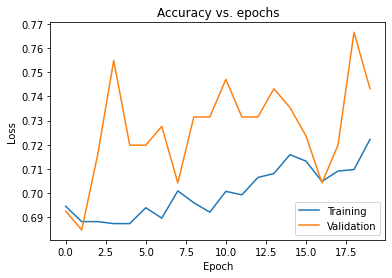

In [ ]:
try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


Plotting the epoch vs Loss

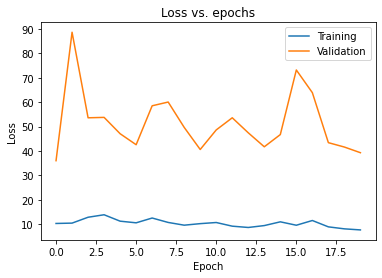

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

## Face Expression Model
The data consists of 48x48 pixel grayscale images of faces. The faces have been automatically registered so that the face is more or less centered and occupies about the same amount of space in each image. The task is to categorize each face based on the emotion shown in the facial expression in to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral).
### Downloading the dataset

In [8]:
! kaggle competitions download -c challenges-in-representation-learning-facial-expression-recognition-challenge

 96% 74.0M/77.3M [00:01<00:00, 42.6MB/s]
100% 77.3M/77.3M [00:01<00:00, 50.1MB/s]
 90% 87.0M/96.6M [00:00<00:00, 123MB/s]
100% 96.6M/96.6M [00:00<00:00, 117MB/s]
  0% 0.00/7.01k [00:00<?, ?B/s]
100% 7.01k/7.01k [00:00<00:00, 7.04MB/s]
 97% 89.0M/92.0M [00:01<00:00, 50.9MB/s]
100% 92.0M/92.0M [00:01<00:00, 54.5MB/s]
 88% 17.0M/19.3M [00:00<00:00, 15.9MB/s]
100% 19.3M/19.3M [00:01<00:00, 19.9MB/s]


In [9]:
! unzip /content/icml_face_data.csv.zip
! unzip /content/test.csv.zip
! unzip /content/train.csv.zip

Archive:  /content/icml_face_data.csv.zip
  inflating: icml_face_data.csv      
Archive:  /content/test.csv.zip
  inflating: test.csv                
Archive:  /content/train.csv.zip
  inflating: train.csv               


### Loading the dataset

In [10]:
facialexpression_df = pd.read_csv('/content/icml_face_data.csv')

In [11]:
facialexpression_df.head(5)

emotion     Usage                                             pixels
0        0  Training  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        0  Training  151 150 147 155 148 133 111 140 170 174 182 15...
2        2  Training  231 212 156 164 174 138 161 173 182 200 106 38...
3        4  Training  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        6  Training  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...

In [12]:
facialexpression_df.columns

Index(['emotion', ' Usage', ' pixels'], dtype='object')

### Dropping the usage column

In [16]:
facialexpression_df.drop(labels = ' Usage', axis = 1, inplace = True)

### Checking for Null values

In [17]:
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [18]:
facialexpression_df[' pixels'][0] # String format

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

### Function to convert pixel values in string format to array format


In [19]:
def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

### Function to resize images from (48, 48) to (96, 96)


In [20]:
def resize(x):
  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [21]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [22]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [23]:
facialexpression_df.head(5)

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[232.82552, 229.81886, 225.59953, 200.68909, ...
3        4  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
4        6  [[4.771652, 3.3384705, 0.9779358, -0.45524597,...

### Shape of the dataset

In [24]:
facialexpression_df.shape

(35887, 2)

In [34]:
label_to_text = {0:'anger', 1:'disgust',2:'fear', 3:'happy', 4:'sad', 5: 'surprise', 6:'neutral'}

### Visualizing the  image in the dataframe and to sure that the image is not distorted by resizing or reshaping operations

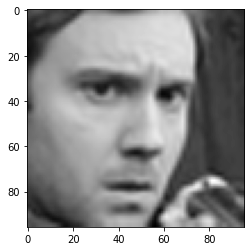

In [35]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

### Visualizing the images and plotting the labels

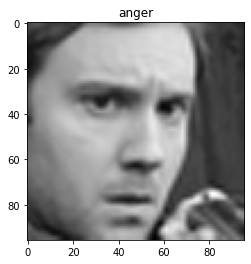

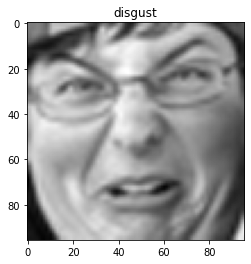

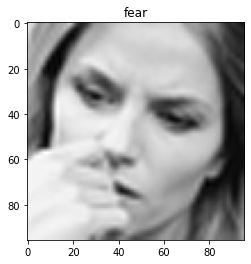

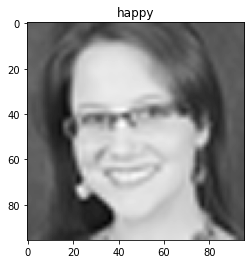

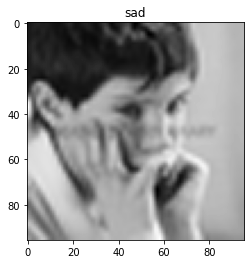

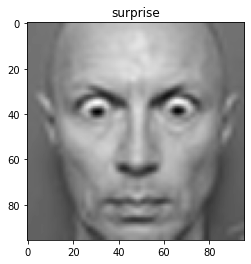

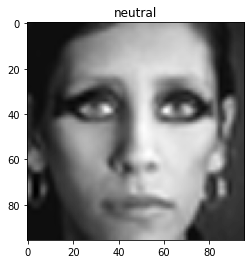

In [36]:
emotions = [0, 1, 2, 3, 4, 5, 6]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

### Plotting the bar chart to outline how many samples (images) are present per emotion

In [37]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 6, 4, 2, 0, 5, 1], dtype='int64')

In [38]:
facialexpression_df.emotion.value_counts()

3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: emotion, dtype: int64

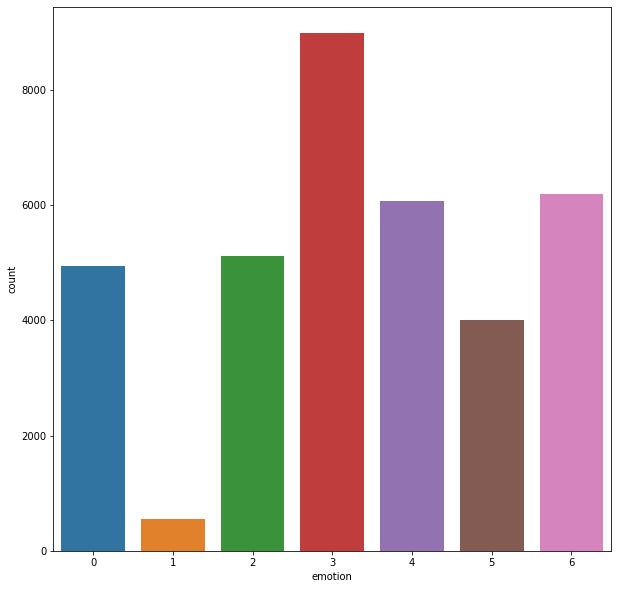

In [40]:
plt.figure(figsize = (10,10))
sns.countplot(x = facialexpression_df.emotion)

### Data preparation and Image Augmentation

#### Splitting the dataframe in to features and labels

In [118]:
from tensorflow.keras.utils import to_categorical

X = facialexpression_df[' pixels']
y = to_categorical(facialexpression_df['emotion'])

In [121]:
X.shape

(35887,)

In [122]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [123]:
X = np.stack(X, axis = 0)
X = X.reshape(35887, 96, 96, 1)

print(X.shape, y.shape)

(35887, 96, 96, 1) (35887, 7)


### Splitting the dataframe in to train, test and validation data frames

In [124]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, shuffle = True)

In [125]:
print(X_val.shape, y_val.shape)

(1794, 96, 96, 1) (1794, 7)


In [126]:
print(X_test.shape, y_test.shape)

(1795, 96, 96, 1) (1795, 7)


In [127]:
print(X_train.shape, y_train.shape)

(32298, 96, 96, 1) (32298, 7)


### Image pre-processing

In [128]:
X_train = X_train/255
X_val   = X_val /255
X_test  = X_test/255

In [130]:
train_datagen = ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest")

### Deep Learning model for Facial Expression classification

In [139]:
input_shape = (96, 96, 1)

# Input tensor shape
X_input = Input(input_shape)

# Zero-padding
X = ZeroPadding2D((3, 3))(X_input)

# 1 - stage
X = Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - stage
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - stage
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - stage
# X = res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Final layer
X = Flatten()(X)
X = Dense(7, activation = 'softmax', name = 'Dense_final', kernel_initializer= glorot_uniform(seed=0))(X)


In [140]:
model_2_emotion = Model( inputs= X_input, outputs = X, name = 'Resnet18')
model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 96, 96, 1)]  0                                            
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 102, 102, 1)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 48, 48, 64)   3200        zero_padding2d_3[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 48, 48, 64)   256         conv1[0][0]                      
___________________________________________________________________________________________

In [141]:
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [142]:
earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5)

# save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath = "FacialExpression_weights.hdf5", verbose = 1, save_best_only=True)

In [143]:
history1 = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 20, callbacks=[checkpointer, earlystopping])

Epoch 1/20
504/504 [==============================] - ETA: 0s - loss: 1.7479 - accuracy: 0.3059
Epoch 00001: val_loss improved from inf to 1.93504, saving model to FacialExpression_weights.hdf5
504/504 [==============================] - 651s 1s/step - loss: 1.7479 - accuracy: 0.3059 - val_loss: 1.9350 - val_accuracy: 0.2464
Epoch 2/20
504/504 [==============================] - ETA: 0s - loss: 1.4728 - accuracy: 0.4314
Epoch 00002: val_loss improved from 1.93504 to 1.69704, saving model to FacialExpression_weights.hdf5
504/504 [==============================] - 649s 1s/step - loss: 1.4728 - accuracy: 0.4314 - val_loss: 1.6970 - val_accuracy: 0.3127
Epoch 3/20
504/504 [==============================] - ETA: 0s - loss: 1.3637 - accuracy: 0.4765
Epoch 00003: val_loss improved from 1.69704 to 1.35485, saving model to FacialExpression_weights.hdf5
504/504 [==============================] - 652s 1s/step - loss: 1.3637 - accuracy: 0.4765 - val_loss: 1.3548 - val_accuracy: 0.4911
Epoch 4/20
504

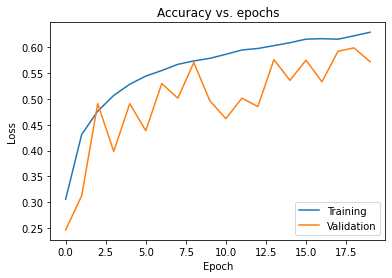

In [145]:
try:
    plt.plot(history1.history['accuracy'])
    plt.plot(history1.history['val_accuracy'])
except KeyError:
    plt.plot(history1.history['acc'])
    plt.plot(history1.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()


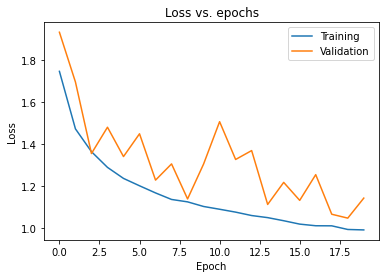

In [146]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

### Saving the model architecture to json file for future use


In [144]:
model_json = model_2_emotion.to_json()
with open("FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

In [148]:
score = model_2_emotion.evaluate(X_test, y_test)
print('Test Accuracy: {}'.format(score[1]))

57/57 [==============================] - 7s 128ms/step - loss: 1.1828 - accuracy: 0.5432
Test Accuracy: 0.543175458908081


### Making Predictions 

In [149]:
predicted_classes = np.argmax(model_2_emotion.predict(X_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

In [150]:
y_true.shape

(1795,)

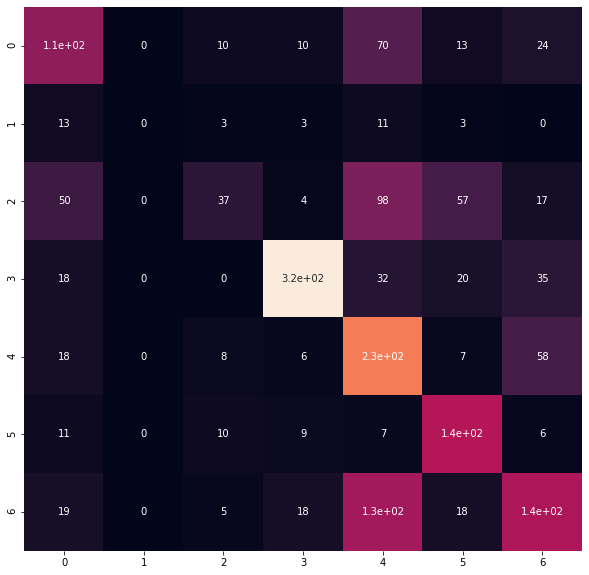

In [151]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

### Printing out a grid of 25 images along with their predicted/true label and the classification report and analyze precision and recall

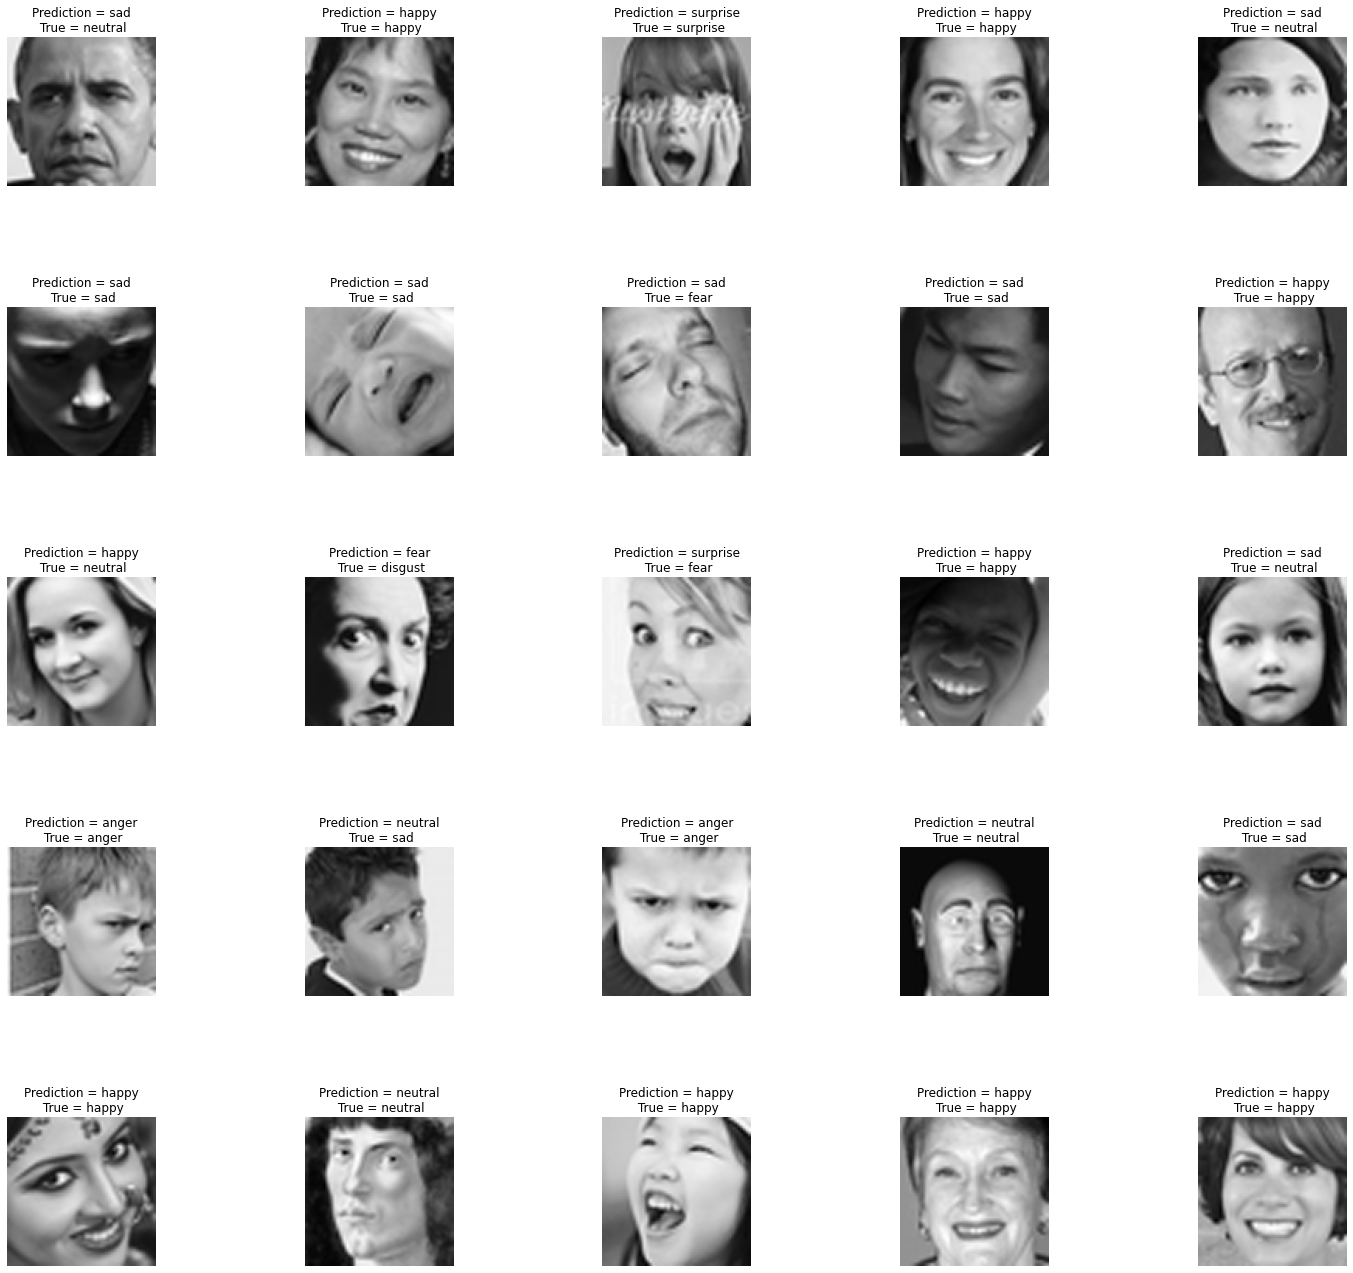

In [152]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Prediction = {}\n True = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)   

In [175]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.47      0.47      0.47       241
           1       0.00      0.00      0.00        33
           2       0.51      0.14      0.22       263
           3       0.86      0.75      0.80       422
           4       0.40      0.70      0.51       328
           5       0.54      0.77      0.63       183
           6       0.49      0.42      0.45       325

    accuracy                           0.54      1795
   macro avg       0.47      0.46      0.44      1795
weighted avg       0.56      0.54      0.52      1795



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [167]:
model = load_model('/content/FacialKeyPoints_weights.hdf5')

## Combining both the facical key points detection and facial expression models

In [154]:
def predict(X_test):

  # Making prediction from the keypoint model
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Making prediction from the emotion model
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [155]:
df_predict = predict(X_test)

In [174]:
df_predict.head(5)

left_eye_center_x  left_eye_center_y  ...  mouth_center_bottom_lip_y  emotion
0                0.0                0.0  ...                   0.018417        4
1                0.0                0.0  ...                   0.023354        3
2                0.0                0.0  ...                   0.018693        5

[3 rows x 31 columns]

### Plotting the test images and their predicted keypoints and emotions

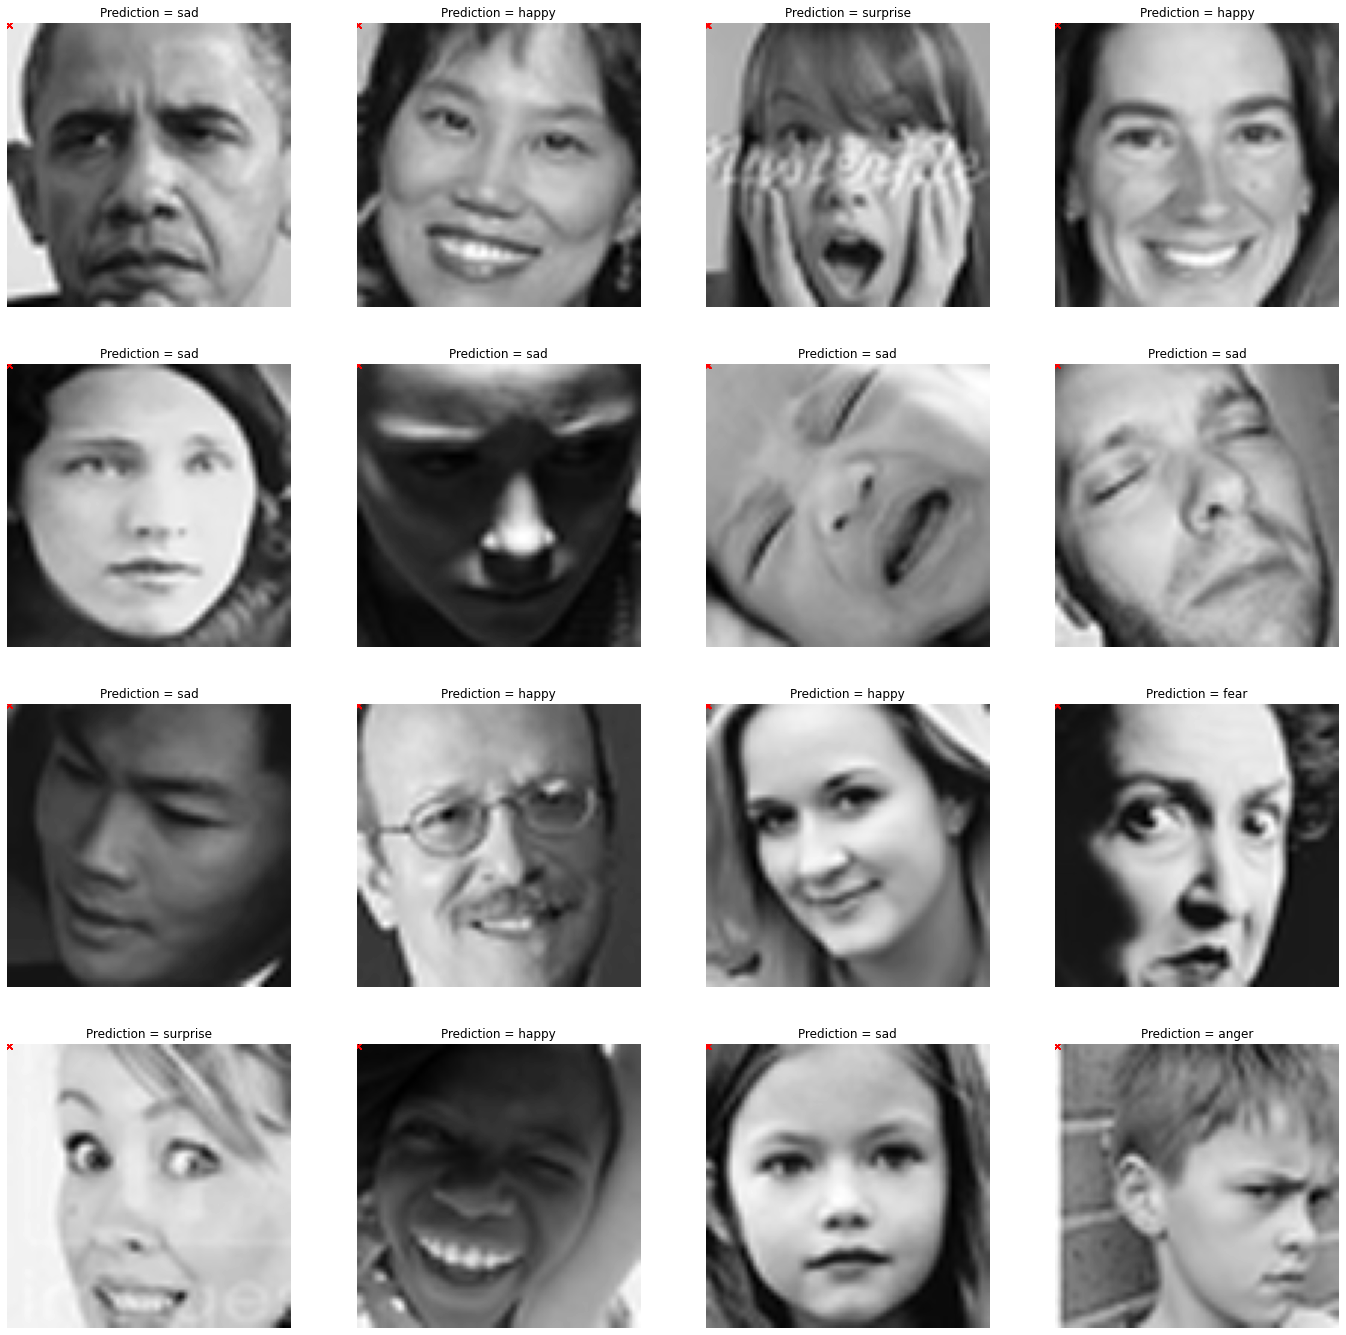

In [156]:
fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

## Deploying both the models in Tensorflow Serving

In [177]:
import json
import tensorflow.keras.backend as K

In [187]:
def deploy(directory, model):
  MODEL_DIR = directory
  version = 1 

  # Joining the temp model directory with our chosen version number 
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Saving the model using saved_model.save
  if os.path.isdir(export_path):
    print('\n Already saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

### Serving the model using TensorFlow serving

In [188]:
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2943  100  2943    0     0    99k      0 --:--:-- --:--:-- --:--:--   99k
OK
Hit:1 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/comp

### Installing tensorflow model server

In [189]:
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tensorflow-model-server is already the newest version (2.3.0).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


We will load our model and start making inferences (predictions) based on it.

There are some important parameters:

*   rest_api_port: The port that you'll use for REST requests.
*   model_name: You'll use this in the URL of REST requests. You can choose any name
*   model_base_path: This is the path to the directory where you've saved your model.

REST is a revival of HTTP in which http commands have semantic meaning.







In [190]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1


 Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /model/1/assets


In [195]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 7 in a separate thread.


In [196]:
!tail server.log

2020-11-07 14:35:15.513683: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model1/1
2020-11-07 14:35:15.615598: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 637994 microseconds.
2020-11-07 14:35:15.626358: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2020-11-07 14:35:15.626526: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: keypoint_model version: 1}
2020-11-07 14:35:15.629304: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 4500
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.


In [197]:
deploy('/model1', model_2_emotion)

export_path = /model1/1


 Already saved a model, cleaning up

INFO:tensorflow:Assets written to: /model1/1/assets


In [198]:
%%bash --bg 
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

Starting job # 8 in a separate thread.


In [199]:
!tail server.log

2020-11-07 14:36:16.537305: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /model1/1
2020-11-07 14:36:16.636656: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:303] SavedModel load for tags { serve }; Status: success: OK. Took 636959 microseconds.
2020-11-07 14:36:16.647148: I tensorflow_serving/servables/tensorflow/saved_model_warmup_util.cc:59] No warmup data file found at /model1/1/assets.extra/tf_serving_warmup_requests
2020-11-07 14:36:16.647329: I tensorflow_serving/core/loader_harness.cc:87] Successfully loaded servable version {name: emotion_model version: 1}
2020-11-07 14:36:16.650835: I tensorflow_serving/model_servers/server.cc:367] Running gRPC ModelServer at 0.0.0.0:8500 ...
[warn] getaddrinfo: address family for nodename not supported
[evhttp_server.cc : 223] NET_LOG: Couldn't bind to port 4000
[evhttp_server.cc : 63] NET_LOG: Server has not been terminated. Force termination now.
[

### Making request to the model in tensorflow serving

In [200]:
import json

# Let's create a JSON object and make 3 inference requests
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ... 592], [0.2604520916938782], [0.2722616195678711]]]]}


In [201]:
!pip install -q requests

### Function to make predictions from deployed models

In [202]:
import requests

def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)
  
  # Reshaping array from (856,) to (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Converting the predictions into a dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Adding emotion into the predicted dataframe
  df_predict['emotion'] = df_emotion

  return df_predict

In [203]:
# making prediction
df_predict = response(data)

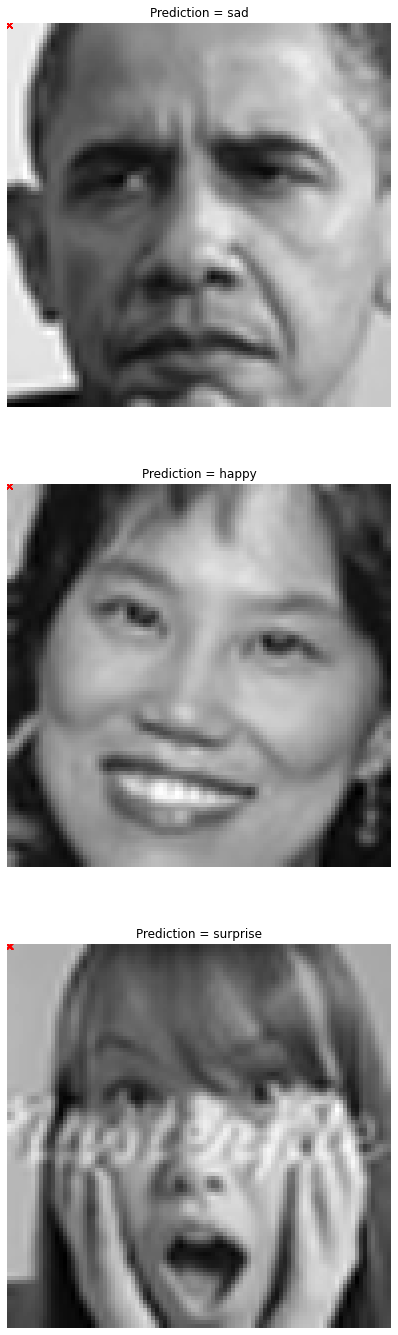

In [204]:
# Plotting the test images and their predicted keypoints and emotions

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')
            